# CNN(convolutional neural network)

In [1]:
# need library
import numpy as np
import tensorflow as tf
# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None
# 딥러닝 구동에 필요한 케라스 함수
from keras.models import Sequential
from keras.layers import Dense    

Using TensorFlow backend.


## data handling

In [4]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# MNIST data (손글씨)
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("검증셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
검증셋 이미지 수 : 10000 개


In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### graph

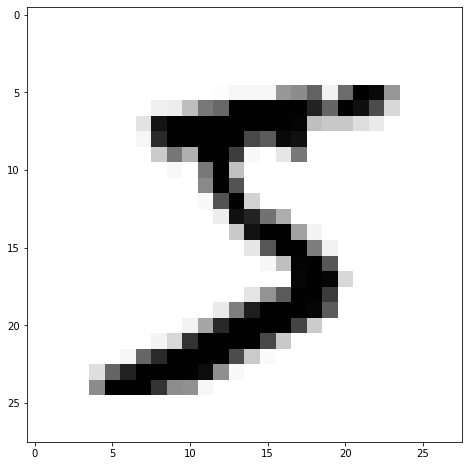

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.imshow(X_train[0], cmap='Greys')
plt.show()

### checking with code

In [8]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')    

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### data dimension transformation and normalization

In [9]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255 # reshape : 1차원 배열로 변환 (input layer)
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255 # astype : 실수로 변환 후 255로 나누어서 정규화(normalization)
# 이름 확인
print("class : %d " % (Y_class_train[0]))

class : 5 


### one_hot encoding

In [11]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_class_train,10)
Y_test = np_utils.to_categorical(Y_class_test,10)
# 출력
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Deep Learning basic frame

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='softplus'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
import os
import sys

# 모델 최적화 설정
MODEL_DIR = 'mnist_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5"    
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.4144 - acc: 0.8822 - val_loss: 0.2620 - val_acc: 0.9259

Epoch 00001: val_loss improved from inf to 0.26196, saving model to mnist_model/01-0.2620.hdf5
Epoch 2/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.2389 - acc: 0.9320 - val_loss: 0.1970 - val_acc: 0.9427

Epoch 00002: val_loss improved from 0.26196 to 0.19696, saving model to mnist_model/02-0.1970.hdf5
Epoch 3/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.1820 - acc: 0.9477 - val_loss: 0.1622 - val_acc: 0.9522

Epoch 00003: val_loss improved from 0.19696 to 0.16221, saving model to mnist_model/03-0.1622.hdf5
Epoch 4/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.1407 - acc: 0.9594 - val_loss: 0.1274 - val_acc: 0.9622

Epoch 00004: val_loss improved from 0.16221 to 0.12743, saving model to mnist_model/04-0.1274.hdf5
Epoch 

In [23]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 20us/step

 Test Accuracy: 0.9816


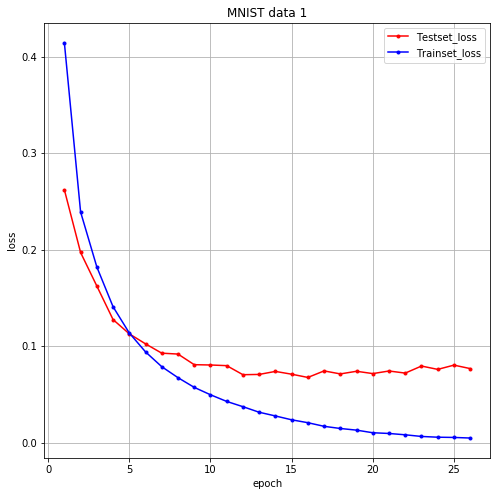

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y_vloss = history.history['val_loss'] # 검증셋으로 측정한 오차
y_loss = history.history['loss'] # 학습셋의 오차
y_acc = history.history['acc'] # 학습셋의 정확도
x_len = np.arange(1,len(y_loss)+1)

plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('MNIST data 1')
plt.show()

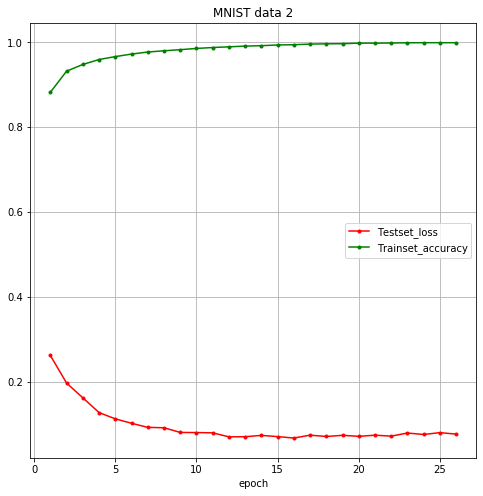

In [28]:
plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_acc, marker='.', c='green', label='Trainset_accuracy')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.title('MNIST data 2')
plt.show()

## Convolutional Neural Network

### CNN
- 입력된 image에서 다시 한번 특징을 추출하기 위해 mask(filter, window 또는 kernel)를 도입하는 기법
- 공간정보를 유지하기 위함

### Max-pooling
- CNN에 의한 결과가 여전히 크고 복잡한 경우 다시 한번 축소하는 과정

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import numpy as np
import os
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
# 마스크 갯수, 마스크의 크기, 입력되는 값 및 색상, 활성화 함수
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # input_shape=(행, 열, 색상(3) 또는 흑백(1))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2)) # pool_size=2 : 절반으로 줄임
model.add(Dropout(0.25)) # 과적합 방지를 위한 25% 노드 끄기
model.add(Flatten()) # CNN이나 max-pooling의 경우 주어진 이미지를 2차원 배열인 채로 다루기 때문에 이를 1차원으로 바꿔야 함
model.add(Dense(128,  activation='softplus'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [5]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR = 'mnist_model//'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="mnist_model//{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=1, 
                    callbacks=[early_stopping_callback,checkpointer])

W0819 11:28:50.165331  5424 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 56s 939us/step - loss: 0.3402 - acc: 0.8951 - val_loss: 0.0647 - val_acc: 0.9800

Epoch 00001: val_loss improved from inf to 0.06473, saving model to mnist_model//01-0.0647.hdf5
Epoch 2/30
60000/60000 [==============================] - 59s 983us/step - loss: 0.0965 - acc: 0.9714 - val_loss: 0.0423 - val_acc: 0.9849

Epoch 00002: val_loss improved from 0.06473 to 0.04231, saving model to mnist_model//02-0.0423.hdf5
Epoch 3/30
60000/60000 [==============================] - 56s 940us/step - loss: 0.0690 - acc: 0.9788 - val_loss: 0.0402 - val_acc: 0.9871

Epoch 00003: val_loss improved from 0.04231 to 0.04017, saving model to mnist_model//03-0.0402.hdf5
Epoch 4/30
60000/60000 [==============================] - 59s 989us/step - loss: 0.0584 - acc: 0.9817 - val_loss: 0.0310 - val_acc: 0.9887

Epoch 00004: val_loss improved from 0.04017 to 0.03104, saving model to mnist_model//04-0.0310

In [8]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 186us/step

 Test Accuracy: 0.9926


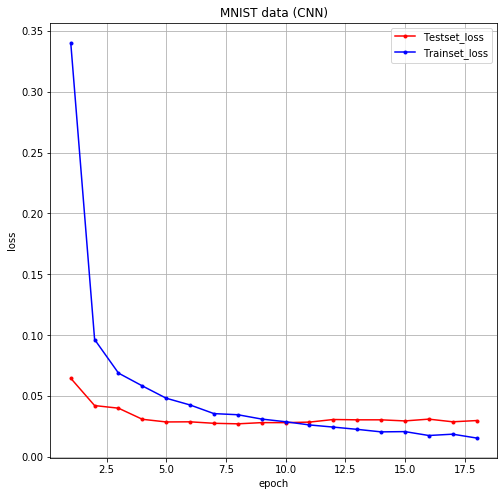

In [10]:
# 그래프 
import matplotlib.pyplot as plt
%matplotlib inline
y_vloss = history.history['val_loss'] # 검증셋으로 측정한 오차
y_loss = history.history['loss'] # 학습셋의 오차
x_len = np.arange(1,len(y_loss)+1)

plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('MNIST data (CNN)')
plt.show()